In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline
plt.style.use('fivethirtyeight')

import yfinance as yf 

In [2]:
import pymc as pm
import arviz as az

In [3]:
print(np.__version__)
print(pm.__version__)
print(az.__version__)

1.23.5
5.7.2
0.19.0


## 関数定義

In [4]:
# # シミュレーション関数(初期値は入力済み)
# def monte_carlo_dcf_simulation(num_scenarios = 10000, prediction_period = 5, 
#                                cost_of_equity = 0.2, cost_of_debt = 0.03, tax_rate = 0.3,
#                                market_capitalization = 20e6, debt = 30e6, initial_FCFF = 10e6,
#                                growth_rate = 0.1, std_growth_rate = 0.1, terminal_growth_rata = 0.01):
#     # 割引率
#     required_rate_of_return = calc_wacc(cost_of_equity, cost_of_debt, 
#                                         tax_rate, market_capitalization, debt)
    
#     future_FCFF_li_2d =[]
#     present_FCFF_li_2d = []
#     present_terminal_value_li = []
#     present_value_li = []
#     for _ in range(num_scenarios):

#         # 予測期間のキャッシュフロー
#         future_FCFF = initial_FCFF
#         future_FCFF_li =[]
#         for i in range(prediction_period):
#             future_FCFF = future_FCFF * (1 + np.random.normal(growth_rate, growth_rate * std_growth_rate))
#             future_FCFF_li.append(future_FCFF)

#         # キャッシュフローの現在価値
#         present_FCFF_li = []
#         for i, fcff in enumerate(future_FCFF_li):
#             present_fcff = fcff/ ((1 + required_rate_of_return)**(i+1))
#             present_FCFF_li.append(present_fcff)

#         # ターミナルバリューの現在価値
#         terminal_value = future_FCFF_li[prediction_period - 1] / (required_rate_of_return - terminal_growth_rata)
#         present_terminal_value = terminal_value / ( 1 + required_rate_of_return )**(prediction_period)

#         # 現在価値
#         present_value = sum(present_FCFF_li) + present_terminal_value
        
#         future_FCFF_li_2d.append(future_FCFF_li)
#         present_FCFF_li_2d.append(present_FCFF_li)
#         present_terminal_value_li.append(present_terminal_value)
#         present_value_li.append(present_value)
#         pres_value_median = np.median(present_value_li)
#         pres_value_2_5_per = np.percentile(present_value_li, 2.5)
#         pres_value_5_per = np.percentile(present_value_li, 97.5)
#         pres_value_95_per = np.percentile(present_value_li, 2.5)
#         pres_value_97_5_per = np.percentile(present_value_li, 97.5)


#         result = {
#             "future_FCFF_li_2d":future_FCFF_li_2d,
#             "present_value_li": present_value_li,
#             "present_FCFF_li_2d":present_FCFF_li_2d,
#             "present_terminal_value_li":present_terminal_value_li, 
#             "wacc": required_rate_of_return,
#             "pres_value_median": pres_value_median,
#             "pres_value_2_5_per": pres_value_2_5_per,
#             "pres_value_5_per": pres_value_5_per,
#             "pres_value_95_per": pres_value_95_per,
#             "pres_value_97_5_per": pres_value_97_5_per
#         }
    
#     return result

In [5]:
# シミュレーション関数(初期値は入力済み)
def monte_carlo_dcf_simulation(num_scenarios = 10000, prediction_period = 5, 
                               initial_FCFF = 10e6,growth_rate = 0.1, std_growth_rate = 0.1, 
                               terminal_growth_rata = 0.01, required_rate_of_return = 0.15):

    future_FCFF_li_2d =[]
    present_FCFF_li_2d = []
    present_terminal_value_li = []
    present_value_li = []
    for _ in range(num_scenarios):

        # 予測期間のキャッシュフロー
        future_FCFF = initial_FCFF
        future_FCFF_li =[]
        for i in range(prediction_period):
            future_FCFF = future_FCFF * (1 + np.random.normal(growth_rate, growth_rate * std_growth_rate))
            future_FCFF_li.append(future_FCFF)

        # キャッシュフローの現在価値
        present_FCFF_li = []
        for i, fcff in enumerate(future_FCFF_li):
            present_fcff = fcff/ ((1 + required_rate_of_return)**(i+1))
            present_FCFF_li.append(present_fcff)

        # ターミナルバリューの現在価値
        terminal_value = future_FCFF_li[prediction_period - 1] / (required_rate_of_return - terminal_growth_rata)
        present_terminal_value = terminal_value / ( 1 + required_rate_of_return )**(prediction_period)

        # 現在価値
        present_value = sum(present_FCFF_li) + present_terminal_value
        
        future_FCFF_li_2d.append(future_FCFF_li)
        present_FCFF_li_2d.append(present_FCFF_li)
        present_terminal_value_li.append(present_terminal_value)
        present_value_li.append(present_value)

    # pres_value_median = np.median(present_value_li)
    # pres_value_2_5_per = np.percentile(present_value_li, 2.5)
    # pres_value_5_per = np.percentile(present_value_li, 97.5)
    # pres_value_95_per = np.percentile(present_value_li, 2.5)
    # pres_value_97_5_per = np.percentile(present_value_li, 97.5)

    result = {
        "future_FCFF_li_2d":future_FCFF_li_2d,
        "present_value_li": present_value_li,
        "present_FCFF_li_2d":present_FCFF_li_2d,
        # "present_terminal_value_li":present_terminal_value_li, 
        # "wacc": required_rate_of_return,
        # "pres_value_median": pres_value_median,
        # "pres_value_2_5_per": pres_value_2_5_per,
        # "pres_value_5_per": pres_value_5_per,
        # "pres_value_95_per": pres_value_95_per,
        # "pres_value_97_5_per": pres_value_97_5_per
    }
    
    return result

## 株主資本コストの推定(ベイズモデリングによるCAPM法でのβの分布推定)

### Prepare Dataset

In [6]:
# set Kyowa Kirin Co., Ltd. and Nikkei 225
stock_e ='4151.T'
stock_m = '^N225'

# set period
start = pd.to_datetime('2021-03-01') 
end = pd.to_datetime('2024-02-29')

# select columns
col_li = ["Adj Close"]

In [7]:
# get data
data_e = yf.download(stock_e, start=start, end=end)
data_m = yf.download(stock_m, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
# column extraction
adjClose_e = data_e[col_li].rename(columns={"Adj Close":"adj_close_a"})
adjClose_m = data_m[col_li].rename(columns={"Adj Close":"adj_close_m"})

In [9]:
# extracting only the end of the month
M_adjClose_e = adjClose_e.resample("ME").last()
M_adjClose_m = adjClose_m.resample("ME").last()

# merge
M_adjClose_merge_df = pd.merge(M_adjClose_e, M_adjClose_m, on="Date", how="inner")

# caluculate log return
M_adjClose_merge_df[['a_log_ret','m_log_ret']] = (
    np.log(M_adjClose_merge_df[['adj_close_a','adj_close_m']]
           /M_adjClose_merge_df[['adj_close_a','adj_close_m']]
           .shift(1))
)
M_adjClose_merge_df.dropna(inplace=True)

In [10]:
# head and shape
print(f"===== dataframe of {stock_e} (equity)=====")
print(M_adjClose_e.shape)
display(M_adjClose_e.head())

print(f"===== dataframe of {stock_m} (market)=====")
print(M_adjClose_m.shape)
display(M_adjClose_m.head())

print(f"===== dataframe of merge_df=====")
print(M_adjClose_merge_df.shape)
display(M_adjClose_merge_df.head())

===== dataframe of 4151.T (equity)=====
(36, 1)


,adj_close_a
Date,
2021-03-31,3109.640137
2021-04-30,3119.034668
2021-05-31,3109.640137
2021-06-30,3723.295410
2021-07-31,3359.470703


===== dataframe of ^N225 (market)=====
(36, 1)


,adj_close_m
Date,
2021-03-31,29178.800781
2021-04-30,28812.630859
2021-05-31,28860.080078
2021-06-30,28791.529297
2021-07-31,27283.589844


===== dataframe of merge_df=====
(35, 4)


,adj_close_a,adj_close_m,a_log_ret,m_log_ret
Date,,,,
2021-04-30,3119.034668,28812.630859,0.003017,-0.012629
2021-05-31,3109.640137,28860.080078,-0.003017,0.001645
2021-06-30,3723.295410,28791.529297,0.180102,-0.002378
2021-07-31,3359.470703,27283.589844,-0.102826,-0.053796
2021-08-31,3397.270996,28089.539062,0.011189,0.029112


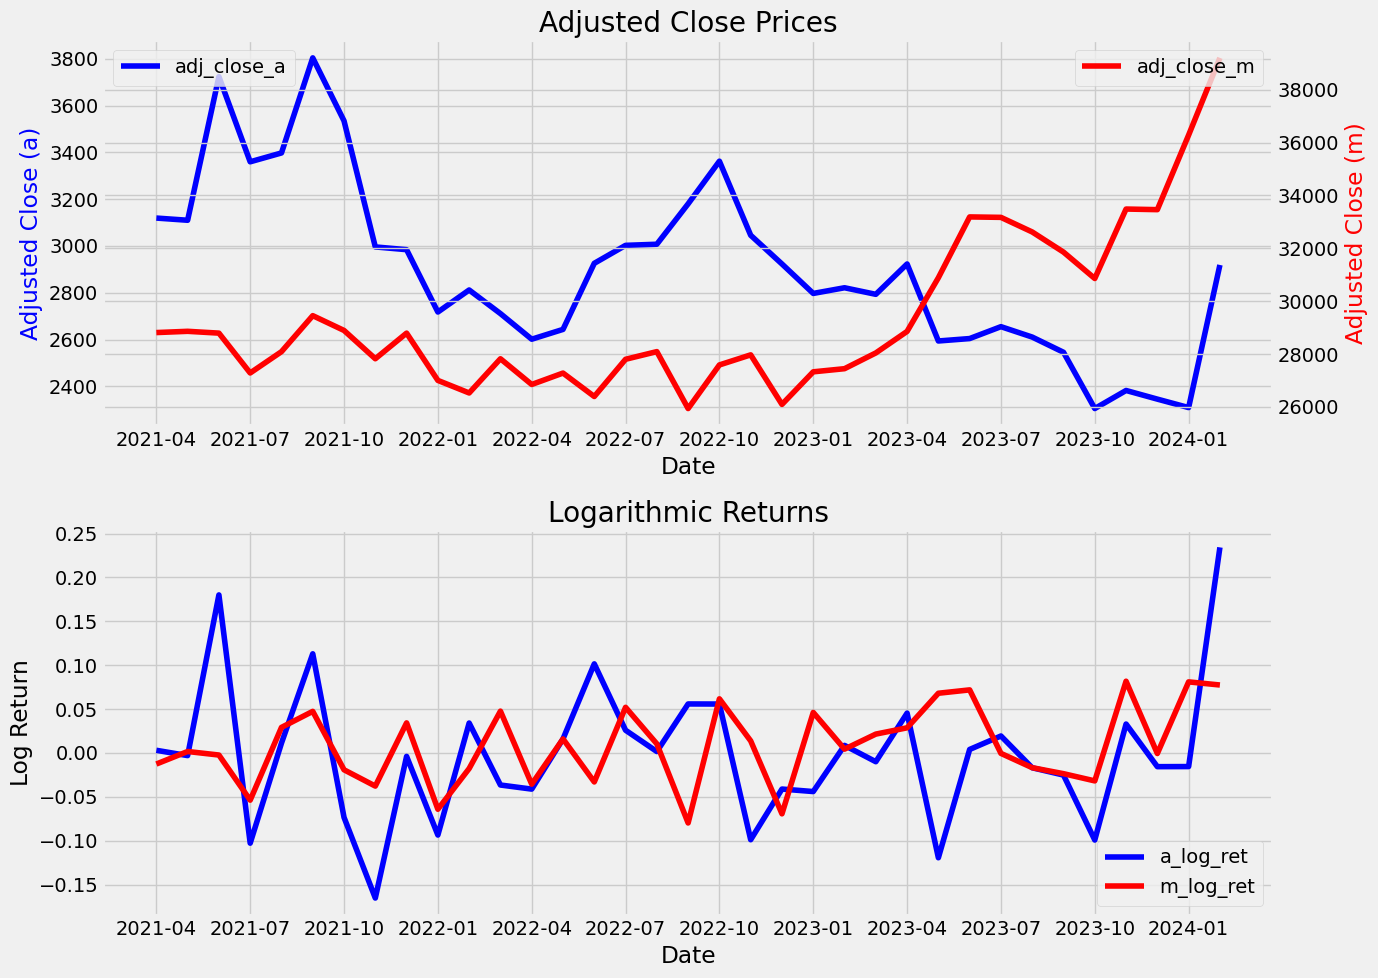

In [11]:
# Reset the index
merge_df_reset = M_adjClose_merge_df.reset_index()
merge_df_reset["YearMonth"] = merge_df_reset["Date"].dt.strftime('%Y-%m')

plt.figure(figsize=(14, 10))

# first plot
plt.subplot(2, 1, 1)
ax1 = plt.gca()  # primary axis
ax2 = ax1.twinx()  # Secondary axis

ax1.plot(merge_df_reset["YearMonth"], merge_df_reset['adj_close_a'], label='adj_close_a', color='blue')
ax2.plot(merge_df_reset['YearMonth'], merge_df_reset['adj_close_m'], label='adj_close_m', color='red')

ax1.set_title('Adjusted Close Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted Close (a)', color='blue')
ax2.set_ylabel('Adjusted Close (m)', color='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)

# Custom tick placement - 3 months apart
tick_indices = np.arange(0, len(merge_df_reset), 3)  # Get indices for every 3 months
ax1.set_xticks(tick_indices)
ax1.set_xticklabels(merge_df_reset['YearMonth'].iloc[tick_indices])

# second plot
plt.subplot(2, 1, 2)
plt.plot(merge_df_reset['YearMonth'], merge_df_reset['a_log_ret'], label='a_log_ret', color='blue')
plt.plot(merge_df_reset['YearMonth'], merge_df_reset['m_log_ret'], label='m_log_ret', color='red')
plt.title('Logarithmic Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)

# Custom tick placement - 3 months apart
plt.xticks(tick_indices, merge_df_reset['YearMonth'].iloc[tick_indices])

plt.tight_layout()
plt.show()

### Bayesian Linear Regression

In [12]:
# prepare dataset
y = M_adjClose_merge_df["a_log_ret"].values
X = M_adjClose_merge_df["m_log_ret"].values

In [13]:
# Define a probabilistic model
model = pm.Model()

with model:
    y_data = pm.Data("y_data", y, mutable=True)
    X_data = pm.Data("X_data", X, mutable=True)

    beta = pm.Normal("beta", mu=0, sigma=10)
    alpha = pm.Normal("alpha", mu=0, sigma=10)

    mu = pm.Deterministic("mu", beta * X_data + alpha)

    epsilon = pm.HalfNormal("epsilon", sigma=10)

    y_pred = pm.Normal("y_pred", mu=mu, sigma=epsilon, observed=y_data)    

# g = pm.model_to_graphviz(model)
# display(g)

In [14]:
# MCMC sampling
with model:
    idata = pm.sample(
        chains = 2,
        tune = 1000,
        draws = 2000,
        random_seed = 42
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta, alpha, epsilon]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


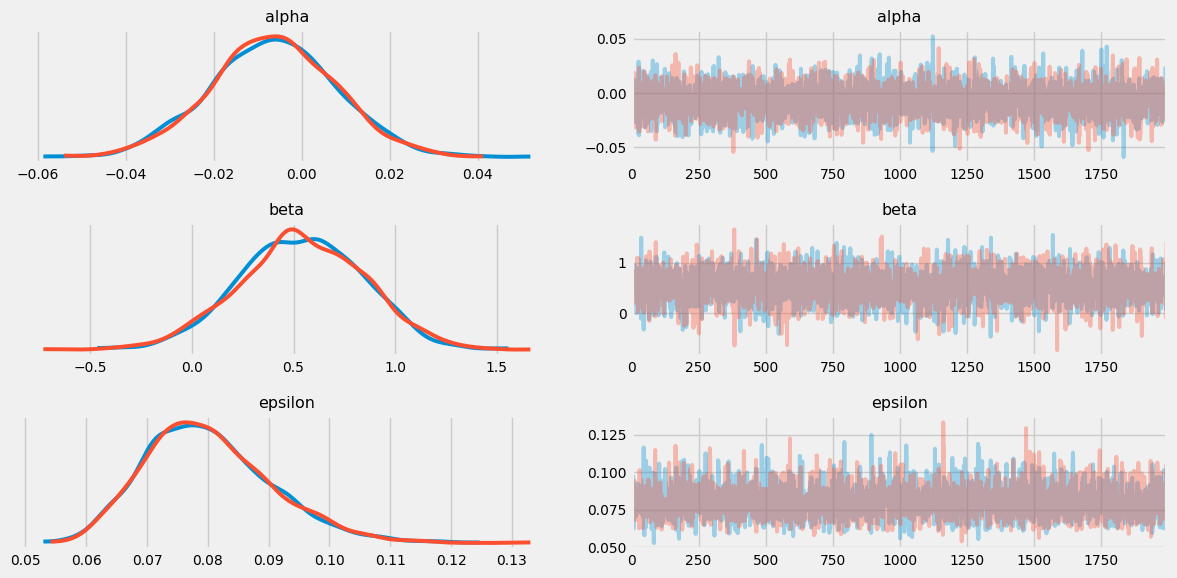

In [15]:
# Visualize the posterior distribution
az.plot_trace(idata, compact=False, var_names=["alpha", "beta", "epsilon"])
plt.tight_layout();

In [16]:
# Statistics of MCMC samples
az.summary(idata, var_names=["alpha", "beta", "epsilon"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.007,0.014,-0.033,0.020,0.000,0.000,4817.0,2621.0,1.0
beta,0.538,0.311,-0.059,1.094,0.004,0.003,4897.0,3153.0,1.0
epsilon,0.080,0.010,0.062,0.100,0.000,0.000,3542.0,2478.0,1.0


In [35]:
az.hdi(idata, var_names=["beta"], hdi_prob=0.90)

<xarray.Dataset> Size: 64B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    beta     (hdi) float64 16B 0.02615 1.035

<Axes: >

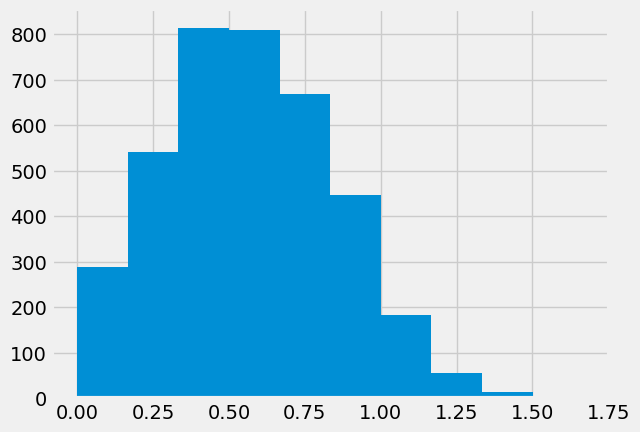

In [17]:
# get beta and sort
beta_array = idata.posterior.beta.values.flatten()
sort_beta_li = np.sort(beta_array)

sort_beta_li = sort_beta_li[sort_beta_li > 0] # only positive
pd.Series(sort_beta_li).hist()

<Axes: >

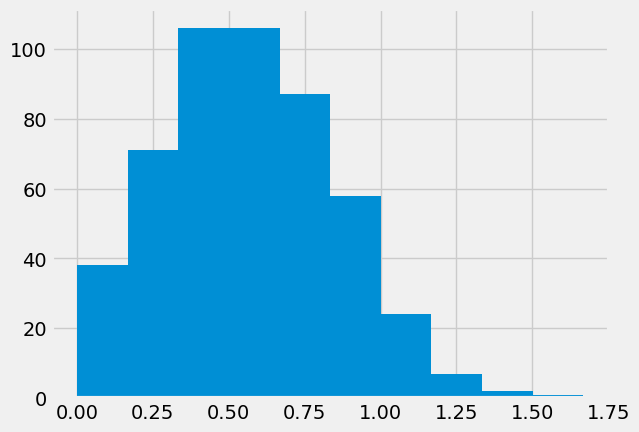

In [18]:
# count index 
n_index = len(sort_beta_li)

# extract bunber
n_select = 500

# create index
indices = np.linspace(0, n_index-1, n_select, dtype=int)

# get extracted parameter
sampling_beta = [sort_beta_li[i] for i in indices]

pd.Series(sampling_beta).hist()

<Axes: >

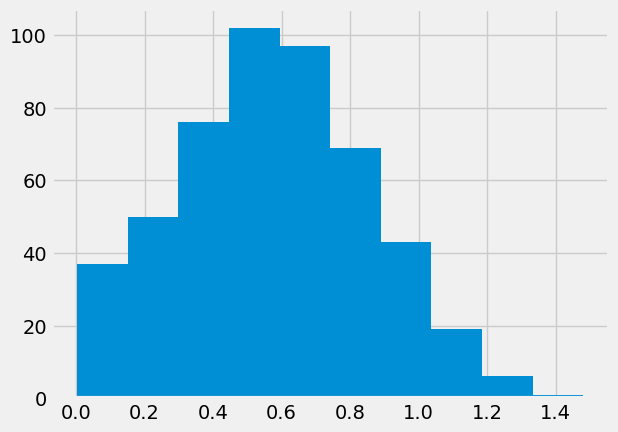

In [19]:
# extract bunber
n_select = 500

# get extracted parameter
sampled_list = np.random.choice(sort_beta_li, n_select, replace=False)

pd.Series(sampled_list).hist()

## WACCの計算

In [20]:
# 協和キリン株式会社のxxxx年xx月度の決算情報を使用
# WACC( = 割引率、要求収益率)の計算

# cost of borrowing
interest_bearing_debt = (16111+17049+8136+25718)*1e6
interest_expenses = (5767 - 245/2 + 392 + 214)*1e6
cost_of_debt = interest_expenses / interest_bearing_debt
income_tax_expense = 16058*1e6
ebt = 97246*1e6
effective_tax_rate = income_tax_expense / ebt

# cost of equity financeing(except for cost of equity)
market_capitalization = 1604880*1e6
market_portforio = 0.1140
risk_free_rate = 0.00877
market_risk_premium = market_portforio - risk_free_rate

print(effective_tax_rate)
print(cost_of_debt)


0.1651276145034243
0.09327155519742143


In [21]:
# cost of equity
cost_of_equity_li = np.array(sampled_list) * market_portforio + risk_free_rate
print(cost_of_equity_li)

[0.07907801 0.04991628 0.01840939 0.03431373 0.07018902 0.03683165
 0.03155204 0.01251732 0.0249497  0.08551589 0.06165322 0.01082898
 0.02969782 0.04117786 0.05507928 0.07211132 0.09643236 0.07763835
 0.04660359 0.05896603 0.06555866 0.06696725 0.06780224 0.06159632
 0.1290582  0.0539373  0.06448958 0.03449635 0.10767165 0.1123628
 0.08510474 0.09275737 0.10990429 0.09990236 0.09783038 0.01754326
 0.1408838  0.01460278 0.1123275  0.12309192 0.06752898 0.0773051
 0.06176323 0.08584654 0.08598278 0.05159735 0.04071333 0.07233199
 0.0915064  0.018015   0.08292124 0.08261615 0.11903652 0.09798814
 0.11456079 0.09682994 0.01425893 0.0901478  0.08997914 0.03970134
 0.12808495 0.1077421  0.07735001 0.15256841 0.01533156 0.05355761
 0.08253636 0.07138268 0.10830949 0.02963941 0.09644572 0.01836087
 0.06801337 0.05773535 0.04300855 0.07536267 0.12807526 0.05209339
 0.05684078 0.08200501 0.10486381 0.12256927 0.09729569 0.07350047
 0.13100032 0.11096424 0.13870775 0.08679908 0.05889015 0.085465

In [22]:
# wacc
D = interest_bearing_debt
E = market_capitalization
wacc_li = []
for cost_of_equity in cost_of_equity_li:
    wacc = ( 
        D / (D+E) * (1-effective_tax_rate) * cost_of_debt
        + E / (D+E) * cost_of_equity
    )
    wacc_li.append(wacc)

wacc_li

[0.07902958299993737,
 0.05103673842921988,
 0.02079272361501867,
 0.03605957264200045,
 0.07049688730251495,
 0.03847657540127843,
 0.03340857809696598,
 0.015136826199555897,
 0.027070878316679033,
 0.08520941739365369,
 0.06230322670990749,
 0.013516154318051634,
 0.03162868270757523,
 0.042648577959655126,
 0.05599278719642462,
 0.07234214138305971,
 0.0956883288886358,
 0.07764762570436645,
 0.04785682083774533,
 0.05972374257558173,
 0.06605212459816981,
 0.06740425902029726,
 0.06820578121689598,
 0.06224860472913607,
 0.1270064326982713,
 0.05489658022328715,
 0.06502589597942818,
 0.036234875946049044,
 0.10647711161210739,
 0.11098022965331315,
 0.08481474866157612,
 0.0921606400691693,
 0.10862026644762467,
 0.0990192416062842,
 0.09703031145117955,
 0.019961309871731,
 0.13835803224844376,
 0.01713868925931185,
 0.11094634347241596,
 0.12127929541417543,
 0.0679434711906326,
 0.0773277403050338,
 0.0624088220671594,
 0.08552681289807257,
 0.0856575910374187,
 0.052650426887

## 現在価値の計算

In [23]:
# ===パラメータ設定===


# 任意に設定: 固定値
num_scenarios = 1000 # 生成するシナリオの数(シミュレーション回数)
prediction_period = 5 # キャッシュフロー予測期間（年）
growth_rate = 0.1 # 成長率

# 任意に設定: 不確実性あり
std_growth_rate = 0.1 # 成長率の変動
terminal_growth_rata = 0.01 # 永久成長率


# 協和キリン株式会社のxxxx年xx月度の決算情報を使用
# フリーキャッシュフローの要素
cf_operating_act = 115551*1e6
cf_investing_act = -20382*1e6
initial_FCFF = cf_operating_act + cf_investing_act # 開始FCFE

In [24]:
res_future_FCFF_li_2d = []
res_present_value_li = []
res_present_FCFF_li_2d = []
res_present_terminal_value_li = []


for required_rate_of_return in wacc_li:
    
    calc_result = monte_carlo_dcf_simulation(num_scenarios, prediction_period, 
                                initial_FCFF, growth_rate, std_growth_rate, 
                                terminal_growth_rata, required_rate_of_return)
    
    res_future_FCFF_li_2d.append(calc_result["future_FCFF_li_2d"])
    res_present_value_li.append(calc_result["present_value_li"])
    res_present_FCFF_li_2d.append(calc_result["present_FCFF_li_2d"])

In [25]:
# 結果取得
present_values = np.array(res_present_value_li).reshape(num_scenarios * n_select)
present_FCFF_array = np.array(res_present_FCFF_li_2d).reshape(num_scenarios * n_select, prediction_period)
future_FCFF_array = np.array(res_future_FCFF_li_2d).reshape(num_scenarios * n_select, prediction_period)

pres_value_median = round(np.median(present_values))
formatted_pres_value_median = f"{pres_value_median:,}"
pres_value_2_5_per = round(np.percentile(present_values, 2.5))
pres_value_97_5_per = round(np.percentile(present_values, 97.5))
formatted_pres_value_2_5_per = f"{pres_value_2_5_per:,}"
formatted_pres_value_97_5_per = f"{pres_value_97_5_per:,}"

print(present_values.shape)
print(present_FCFF_array.shape)
print(future_FCFF_array.shape)
print(formatted_pres_value_median)
print(formatted_pres_value_2_5_per)
print(formatted_pres_value_97_5_per)

(500000,)
(500000, 5)
(500000, 5)
2,191,885,436,950
1,093,702,806,582
19,242,813,656,165


Text(0, 0.5, 'Frequency')

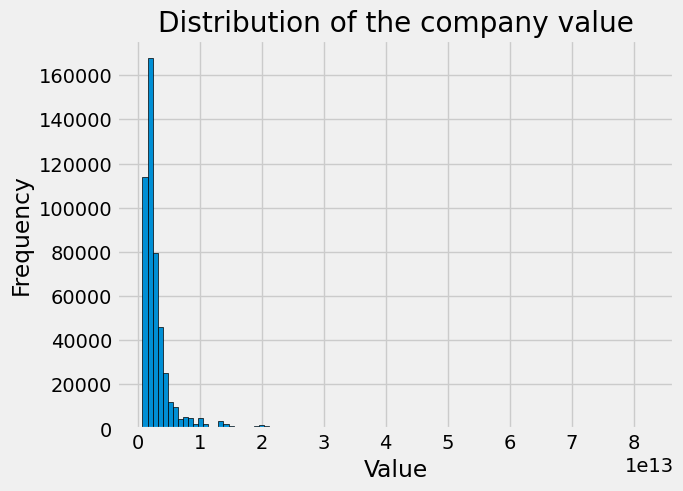

In [26]:
# ヒストグラム可視化
fig, ax = plt.subplots()
ax.hist(present_values, bins=100, edgecolor='black')
ax.set_title('Distribution of the company value')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

In [27]:
future_FCFF_array

array([[1.04349380e+11, 1.14248141e+11, 1.24157961e+11, 1.39511916e+11,
        1.52769951e+11],
       [1.04160547e+11, 1.13481045e+11, 1.25706919e+11, 1.37785180e+11,
        1.50873227e+11],
       [1.05153424e+11, 1.14902045e+11, 1.26035139e+11, 1.37902557e+11,
        1.49817792e+11],
       ...,
       [1.05192852e+11, 1.14376331e+11, 1.25621973e+11, 1.38295389e+11,
        1.53720202e+11],
       [1.03994730e+11, 1.15712604e+11, 1.27834299e+11, 1.43466240e+11,
        1.57344244e+11],
       [1.03514653e+11, 1.14179636e+11, 1.26221856e+11, 1.39336321e+11,
        1.53360707e+11]])

In [28]:
future_FCFF_array[0]

array([1.04349380e+11, 1.14248141e+11, 1.24157961e+11, 1.39511916e+11,
       1.52769951e+11])

Text(0, 0.5, 'value')

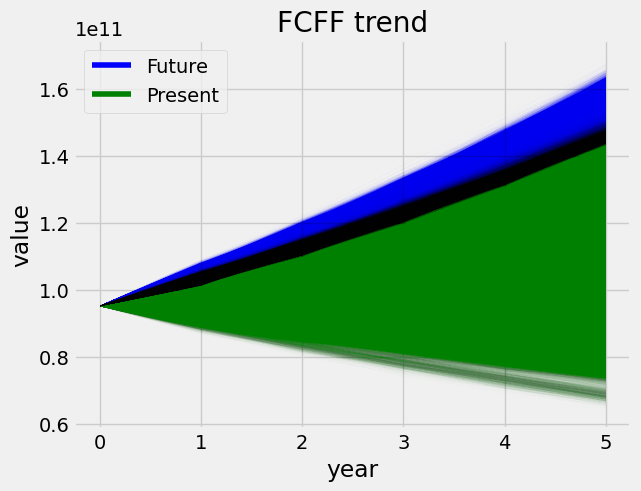

In [29]:
# グラフを作成
fig, ax = plt.subplots()

# 将来キャッシュフローの推移
for row in future_FCFF_array:
    line_data = np.insert(row, 0, initial_FCFF)
    ax.plot(line_data, color="blue", linewidth=0.5, alpha=0.01)

# # 将来キャッシュフローを現在価値に直した場合の推移
for row in present_FCFF_array:
    line_data = np.insert(row, 0, initial_FCFF)
    ax.plot(line_data, color="green", linewidth=0.5, alpha=0.01)

# 凡例を追加
legend_elements = [Line2D([0], [0], color='blue', label='Future'),
                   Line2D([0], [0], color='green', label='Present')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_title('FCFF trend')
ax.set_xlabel('year')
ax.set_ylabel('value')